# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [3]:

#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px
from sklearn.metrics import confusion_matrix

c:\Users\krant\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()




,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [5]:
#your code here

spaceship.shape

(8693, 14)

**Check for data types**

In [6]:
#your code here

spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [7]:
#your code here
spaceship.isnull().count()

PassengerId     8693
HomePlanet      8693
CryoSleep       8693
Cabin           8693
Destination     8693
Age             8693
VIP             8693
RoomService     8693
FoodCourt       8693
ShoppingMall    8693
Spa             8693
VRDeck          8693
Name            8693
Transported     8693
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [8]:

#your code here
spaceship_df = spaceship

spaceship_df.columns = spaceship_df.columns.str.lower().str.replace('[^0-9a-zA-Z]+','_',regex=True)
spaceship_df

spaceship_df[['cryosleep','vip','transported']] =  spaceship_df[['cryosleep','vip','transported']].replace({True: 1, False: 0})




C:\Users\krant\AppData\Local\Temp\ipykernel_13220\2245615655.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spaceship_df[['cryosleep','vip','transported']] =  spaceship_df[['cryosleep','vip','transported']].replace({True: 1, False: 0})


- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [11]:
#your code here
spaceship_df['cabin']=spaceship_df['cabin'].str.split('/').str[0]
# spaceship['cabin_'].value_counts()



- Drop PassengerId and Name

In [9]:
#your code here
spaceship_use = spaceship_df.drop(['passengerid','name'], axis=1)
spaceship_use.dtypes

homeplanet       object
cryosleep         int64
cabin            object
destination      object
age             float64
vip               int64
roomservice     float64
foodcourt       float64
shoppingmall    float64
spa             float64
vrdeck          float64
transported       int64
dtype: object

In [10]:
spaceship_cate_trans = pd.get_dummies(spaceship_use[['homeplanet','destination','cabin']],drop_first=True)
#dtype=int

# Replace values in multiple columns
# replacements = {True: 1, False: 0}
# spaceship_cate_trans = spaceship_cate_trans.replace(replacements, inplace=False)
spaceship_cate_trans


,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T
0,True,False,False,True,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,True,False,False
2,True,False,False,True,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8688,True,False,False,False,False,False,False,False,False,False,False
8689,False,False,True,False,False,False,False,False,False,True,False
8690,False,False,False,True,False,False,False,False,False,True,False
8691,True,False,False,False,False,False,False,True,False,False,False


- For non-numerical columns, do dummies.

In [11]:
# #your code here

# spaceship_trans = spaceship_df.drop(['PassengerId','Cabin','Name'], axis=1)
# spaceship_trans['transported'] = spaceship['transported'].replace(
#     {
# 'HomePlanet'
# 'Earth':0,
# 'Europa':1,
# 'Mars':2,

# # 'CryoSleep'
# True:1,
# False:0,

# # 'cabin_'
# 'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7,

# # # 'Destination'
# 'TRAPPIST-1e' :     0,
# '55 Cancri e'  :    1,
# 'PSO J318.5-22' :   2,

# # 'VIP'
# # True:1,
# # False:0
# # # 'VIP'
# # # True:1,
# # # False:0

    #     }
    # )
# spaceship_trans['VIP'].value_counts()
# spaceship_trans = spaceship_trans.drop(columns=['Cabin'])
# spaceship_trans.columns

# spaceship_trans_drop_not_step = spaceship_df.drop(['HomePlanet', 'CryoSleep', 'Destination',  'VIP',
#        'Transported'], axis=1)
# # spaceship

In [12]:
spaceship_use = pd.concat([spaceship_use, spaceship_cate_trans], axis=1)
spaceship_use = spaceship_use.drop(columns=['homeplanet','destination','cabin'])
spaceship_use
# spaceship_trans['transported'] = spaceship_trans['transported'].replace({True: 1, False: 0})



# ['transported', 'homeplanet_Europa','homeplanet_Mars', 'cryosleep_True','destination_PSO J318.5-22','destination_TRAPPIST-1e', 'vip_True','cabin__B', 'cabin__C', 'cabin__D', 'cabin__E', 'cabin__F', 'cabin__G','cabin__T']
# spaceship_cate_trans.columns




,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,True,False,False,True,True,False,False,False,False,False,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,False,False,False,True,False,False,False,False,True,False,False
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,True,False,False,True,False,False,False,False,False,False,False
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,True,False,False,True,False,False,False,False,False,False,False
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,False,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,True,False,False,False,False,False,False,False,False,False,False
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,False,False,True,False,False,False,False,False,False,True,False
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,False,False,False,True,False,False,False,False,False,True,False
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,True,False,False,False,False,False,False,True,False,False,False


**Perform Train Test Split**

In [13]:
#your code here LABEL ENCODING



features = spaceship_use.drop(columns=['transported'])
target = spaceship_use['transported']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)





In [14]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)

X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm =pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

# knn = KNeighborsClassifier(n_neighbors=10)

# knn.fit(X_train, y_train)
# knn.score(X_train, y_test)



,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T
0,1.0,0.405063,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.050633,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.379747,0.0,0.00000,0.007916,0.000000,0.051276,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.215190,0.0,0.00131,0.000000,0.046111,0.016378,0.000049,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.329114,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_norm,y_train)
knn.score(X_test_norm,y_test)

c:\Users\krant\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7639939485627837

In [16]:
pred =knn.predict(X_test_norm)
pred

c:\Users\krant\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [17]:
#your code here
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.73      0.83      0.78       661
           1       0.81      0.69      0.75       661

    accuracy                           0.76      1322
   macro avg       0.77      0.76      0.76      1322
weighted avg       0.77      0.76      0.76      1322



In [18]:
px.imshow(confusion_matrix(y_test, pred), text_auto=True)

- Evaluate your model's performance. Comment it

In [19]:
#your code here
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test.values, pred)

0.23600605143721634

In [20]:

RMSE = mean_squared_error(y_test.values, pred, squared=False) 
RMSE

0.48580454036290804

In [21]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)
RMSE = mean_squared_error(y_test, pred, squared=False)

print(MSE)
print(RMSE)

0.23600605143721634
0.48580454036290804


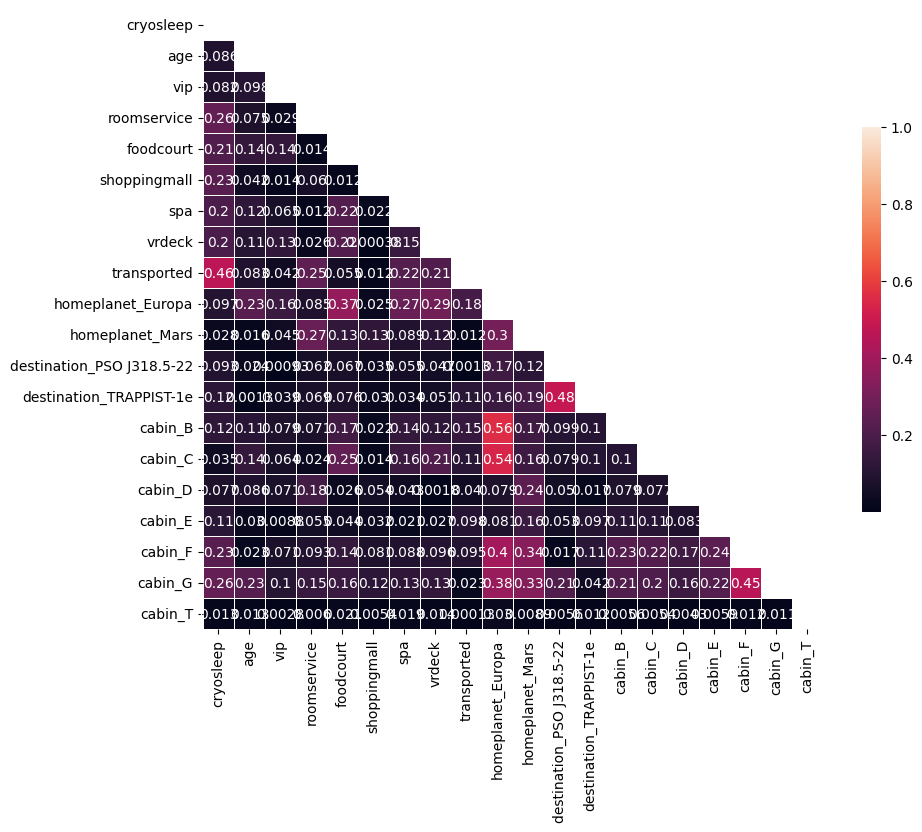

In [22]:
corr=np.abs(spaceship_use.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)


plt.show()



In [23]:
# should you T square test
# for two categorical variables correlations we should look at chi square test

# order them by test p-value statistic  remove the lowest one first then see if the model is better


In [9]:
# spaceship.cabin = spaceship.cabin.str[0]
from scipy.stats import chi2_contingency

In [17]:
freq_df_cabin=spaceship_df[['cabin','transported']].value_counts().reset_index().pivot_table(index='cabin',values='count',columns='transported')
freq_df_cabin_no_t = freq_df_cabin.drop('T')


freq_df_cabin_no_t

transported,0,1
cabin,,
A,129.0,127.0
B,207.0,572.0
C,239.0,508.0
D,271.0,207.0
E,563.0,313.0
F,1565.0,1229.0
G,1238.0,1321.0


In [18]:
chi2_contingency(freq_df_cabin_no_t)

Chi2ContingencyResult(statistic=390.4448836394822, pvalue=3.1655516886703484e-81, dof=6, expected_freq=array([[ 127.01990812,  128.98009188],
       [ 386.51761103,  392.48238897],
       [ 370.64012251,  376.35987749],
       [ 237.16998469,  240.83001531],
       [ 434.64624809,  441.35375191],
       [1386.30321593, 1407.69678407],
       [1269.70290965, 1289.29709035]]))

In [20]:
freq_df_home=spaceship_df[['homeplanet','transported']].value_counts().reset_index().pivot_table(index='homeplanet',values='count',columns='transported')



freq_df_home
chi2_contingency(freq_df_home)

Chi2ContingencyResult(statistic=324.9013834000382, pvalue=2.809059985251311e-71, dof=2, expected_freq=array([[2285.28426755, 2316.71573245],
       [1058.22268017, 1072.77731983],
       [ 873.49305228,  885.50694772]]))

In [23]:
! pip install pingouin
from pingouin import kruskal

In [29]:
spaceship_df['transported'] = spaceship_df['transported'].astype(int)
print(kruskal(spaceship_df,dv='transported', between='cabin'))


spaceship_df['transported'] = spaceship_df['transported'].astype(int)
print(kruskal(spaceship_df,dv='transported', between='homeplanet'))




        Source  ddof1           H         p-unc
Kruskal  cabin      7  392.241857  1.099106e-80
             Source  ddof1           H         p-unc
Kruskal  homeplanet      2  324.863124  2.863314e-71
